In [7]:
import os
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image

In [2]:
import PIL

print(f"Pillow version {PIL.__version__}")

Pillow version 8.1.0


In [3]:
img_folder = os.path.join("../data/AVA/images")
image_name = "953004.jpg"
image_path = os.path.join(img_folder, image_name)
print(image_path)

pil_image = Image.open(image_path)
print(pil_image.format, pil_image.size, pil_image.mode)

../data/AVA/images/953004.jpg
JPEG (665, 800) RGB


In [4]:
data = image.imread(image_path)
print(data.shape, data.dtype)

(800, 665, 3) uint8


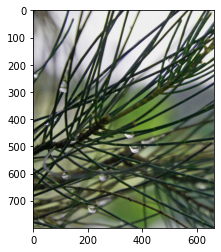

In [5]:
pyplot.imshow(data)
pyplot.show()

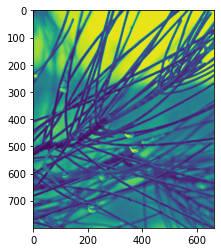

In [9]:
pil_image = Image.open(image_path).convert(mode="L")
pyplot.imshow(np.asarray(pil_image))

### Flip the image

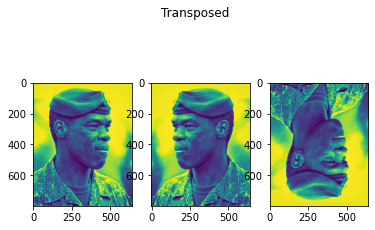

In [19]:
image_path = os.path.join(img_folder, "953349.jpg")
pil_image = Image.open(image_path).convert(mode="L")

fig, axes = plt.subplots(1, 3)
fig.suptitle("Transposed")
axes[0].imshow(pil_image)
axes[1].imshow(pil_image.copy().transpose(Image.FLIP_LEFT_RIGHT))
axes[2].imshow(pil_image.copy().transpose(Image.FLIP_TOP_BOTTOM))
plt.show()

### Rotate the image

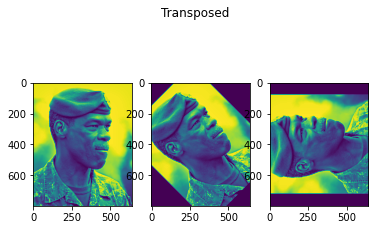

In [20]:
image_path = os.path.join(img_folder, "953349.jpg")
pil_image = Image.open(image_path).convert(mode="L")

fig, axes = plt.subplots(1, 3)
fig.suptitle("Rotation")
axes[0].imshow(pil_image)
axes[1].imshow(pil_image.copy().rotate(45))
axes[2].imshow(pil_image.copy().rotate(90))
plt.show()

### Crop the image

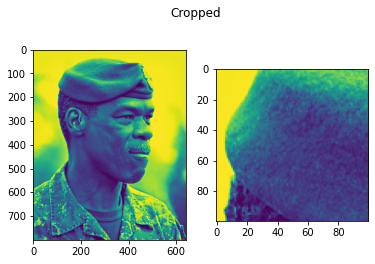

In [27]:
image_path = os.path.join(img_folder, "953349.jpg")
pil_image = Image.open(image_path).convert(mode="L")

fig, axes = plt.subplots(1, 2)
fig.suptitle("Cropped")
axes[0].imshow(pil_image)
axes[1].imshow(pil_image.copy().crop((100, 100, 200, 200)))
plt.show()

### Normalize the image

In [29]:
image_path = os.path.join(img_folder, "953349.jpg")
pil_image = Image.open(image_path)

pixels = np.asarray(pil_image)
print(f"Max value : {pixels.min()}, min value : {pixels.max()}")

pixels = pixels / 255
print(f"Max value : {pixels.min()}, min value : {pixels.max()}")

Max value : 0, min value : 255
Max value : 0.0, min value : 1.0


### Global centering the image

In [31]:
image_path = os.path.join(img_folder, "953349.jpg")
pil_image = Image.open(image_path)

pixels = np.asarray(pil_image)
print(
    f"Max value : {pixels.max()}, min value : {pixels.min()}, mean value : {pixels.mean()}"
)

pixels = pixels.astype("float32")
pixels = pixels - pixels.mean()
print(f"Max value : {pixels.min()}, min value : {pixels.max()}")

Max value : 0, min value : 255, mean value : 139.244537109375
Max value : -139.24452209472656, min value : 115.75547790527344


### Local centering the image

In [63]:
image_path = os.path.join(img_folder, "953889.jpg")
pil_image = Image.open(image_path)

axis = (0, 1)
pixels = np.asarray(pil_image).astype("float32")
means = pixels.mean(axis=axis, dtype="float64")
print(f"mean value : {pixels.mean(axis=axis)}")
print( f"Max value : {pixels.max(axis=axis)}, min value : {pixels.min(axis=axis)}" )

pixels -= means
print(f"mean value : {pixels.mean(axis=axis)}")
print(f'Max value : {pixels.min(axis=axis)}, min value : {pixels.max(axis=axis)}')

mean value : [109.49575   54.820953 159.88322 ]
Max value : [255. 255. 255.], min value : [0. 0. 0.]
mean value : [-0.00453245 -0.00051836 -0.00466973]
Max value : [-109.495285  -54.8229   -159.87015 ], min value : [145.50471 200.1771   95.12985]


pixels[0].mean(axis=(0, 1))

## ImageDataGenerator

In [96]:
import tensorflow as tf
import keras

In [100]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator

def get_reshaped_mnist():
    # Load the MNIST Dataset
    (trainX, trainY), (testX, testY) = mnist.load_data()

    channels = 1
    _, width, height = trainX.shape

    ##### Reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0], width, height, channels))
    testX = testX.reshape((testX.shape[0], width, height, channels))
    print(f"Train min : {trainX.min(): .2f} , max : {trainX.max(): .2f}")
    print(f"Test min : {testX.min(): .2f} , max : {testX.max(): .2f}")
    return (trainX, trainY), (testX, testY)


#### Normalize the images 

In [99]:
(trainX, trainY), (testX, testY) = get_reshaped_mnist()

datagen = ImageDataGenerator(rescale=1.0/255)
# prepare iterator to scale images
train_iterator = datagen.flow(trainX, trainY, batch_size=64)
test_iterator = datagen.flow(testX, testY, batch_size=64)
print(f"Batches train={len(train_iterator)}, test={len(test_iterator)}")

batchX, batchY = train_iterator.next()
print(f"Batch shape={batchX.shape}, min={batchX.min()}, max={batchX.max()}")

Batches train=938, test=157
Batch shape=(64, 28, 28, 1), min=0.0, max=1.0


#### Center images

In [112]:
(trainX, trainY), (testX, testY) = get_reshaped_mnist()
print(f"Train : mean-{trainX.mean():.3f}, std-{trainX.std():.3f}")
print(f"Test : mean-{testX.mean():.3f}, std-{testX.std():.3f}")

# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# calculate the mean on the training dataset
datagen.fit(trainX)
print(f"Data Generator Mean: {datagen.mean}, Std: {datagen.std}")

# demonstrate effect on a single batch of samples
iterator = datagen.flow(trainX, trainY, batch_size=64)
# get a batch
batchX, batchy = iterator.next()
# mean pixel value in the batch
print(batchX.shape, batchX.mean(), batchX.std())

# demonstrate effect on entire training dataset
iterator = datagen.flow(trainX, trainY, batch_size=len(trainX), shuffle=False)
# get a batch
batchX, batchy = iterator.next()
# mean pixel value in the batch
print(batchX.shape, batchX.mean(), batchX.std())

Train min :  0.00 , max :  255.00
Test min :  0.00 , max :  255.00
Train : mean-33.318, std-78.567
Test : mean-33.791, std-79.172
Data Generator Mean: [[[33.318447]]], Std: [[[78.567444]]]
(64, 28, 28, 1) -0.01895679 0.9772718
(60000, 28, 28, 1) -3.4560264e-07 0.9999998


In [116]:
keras.backend.image_data_format()

'channels_last'